In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu
import scipy.stats

In [2]:
df=pd.read_csv('ga_sessions.csv')
df

C:\Users\Prokofiy\AppData\Local\Temp\ipykernel_17648\163500865.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [3]:
df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


<Axes: >

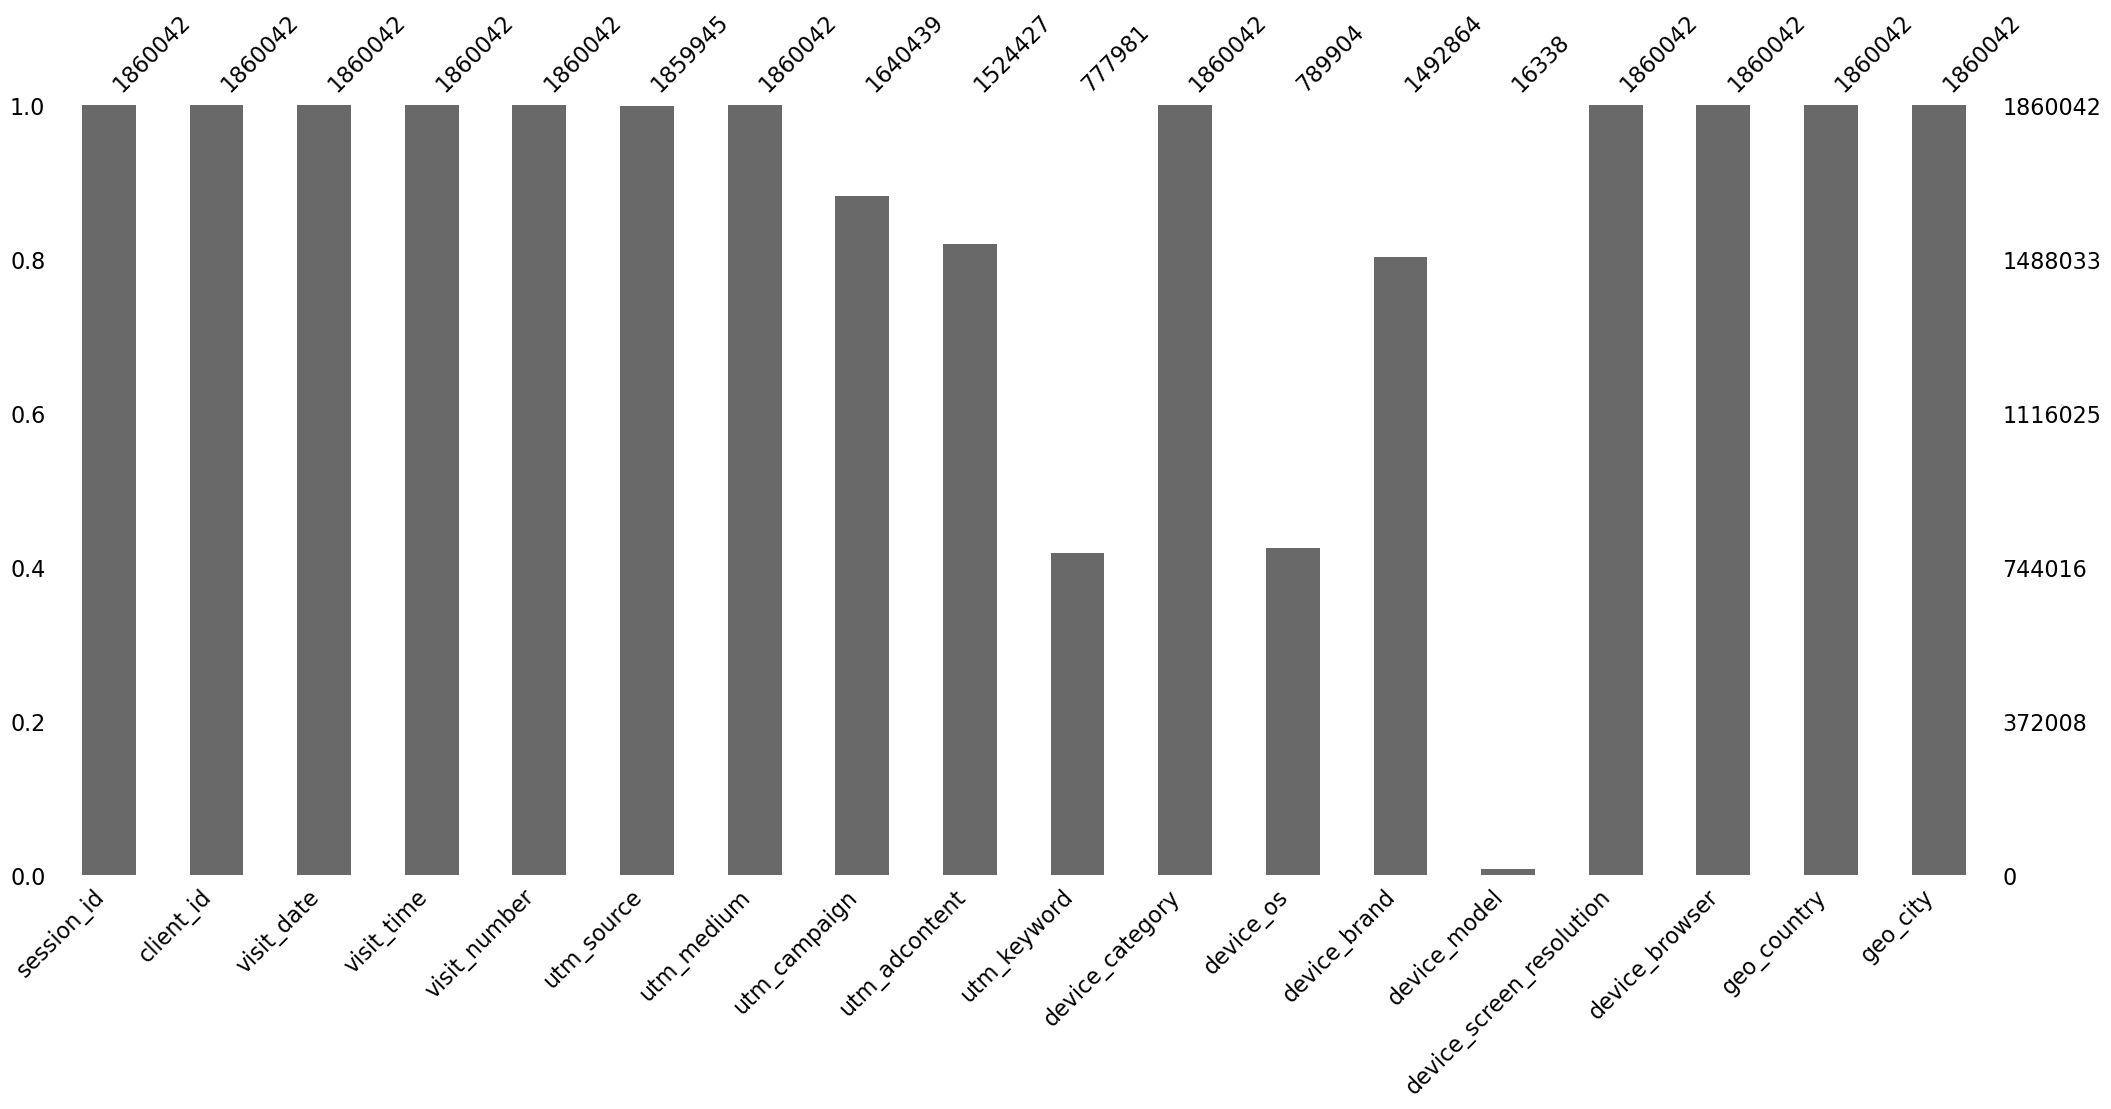

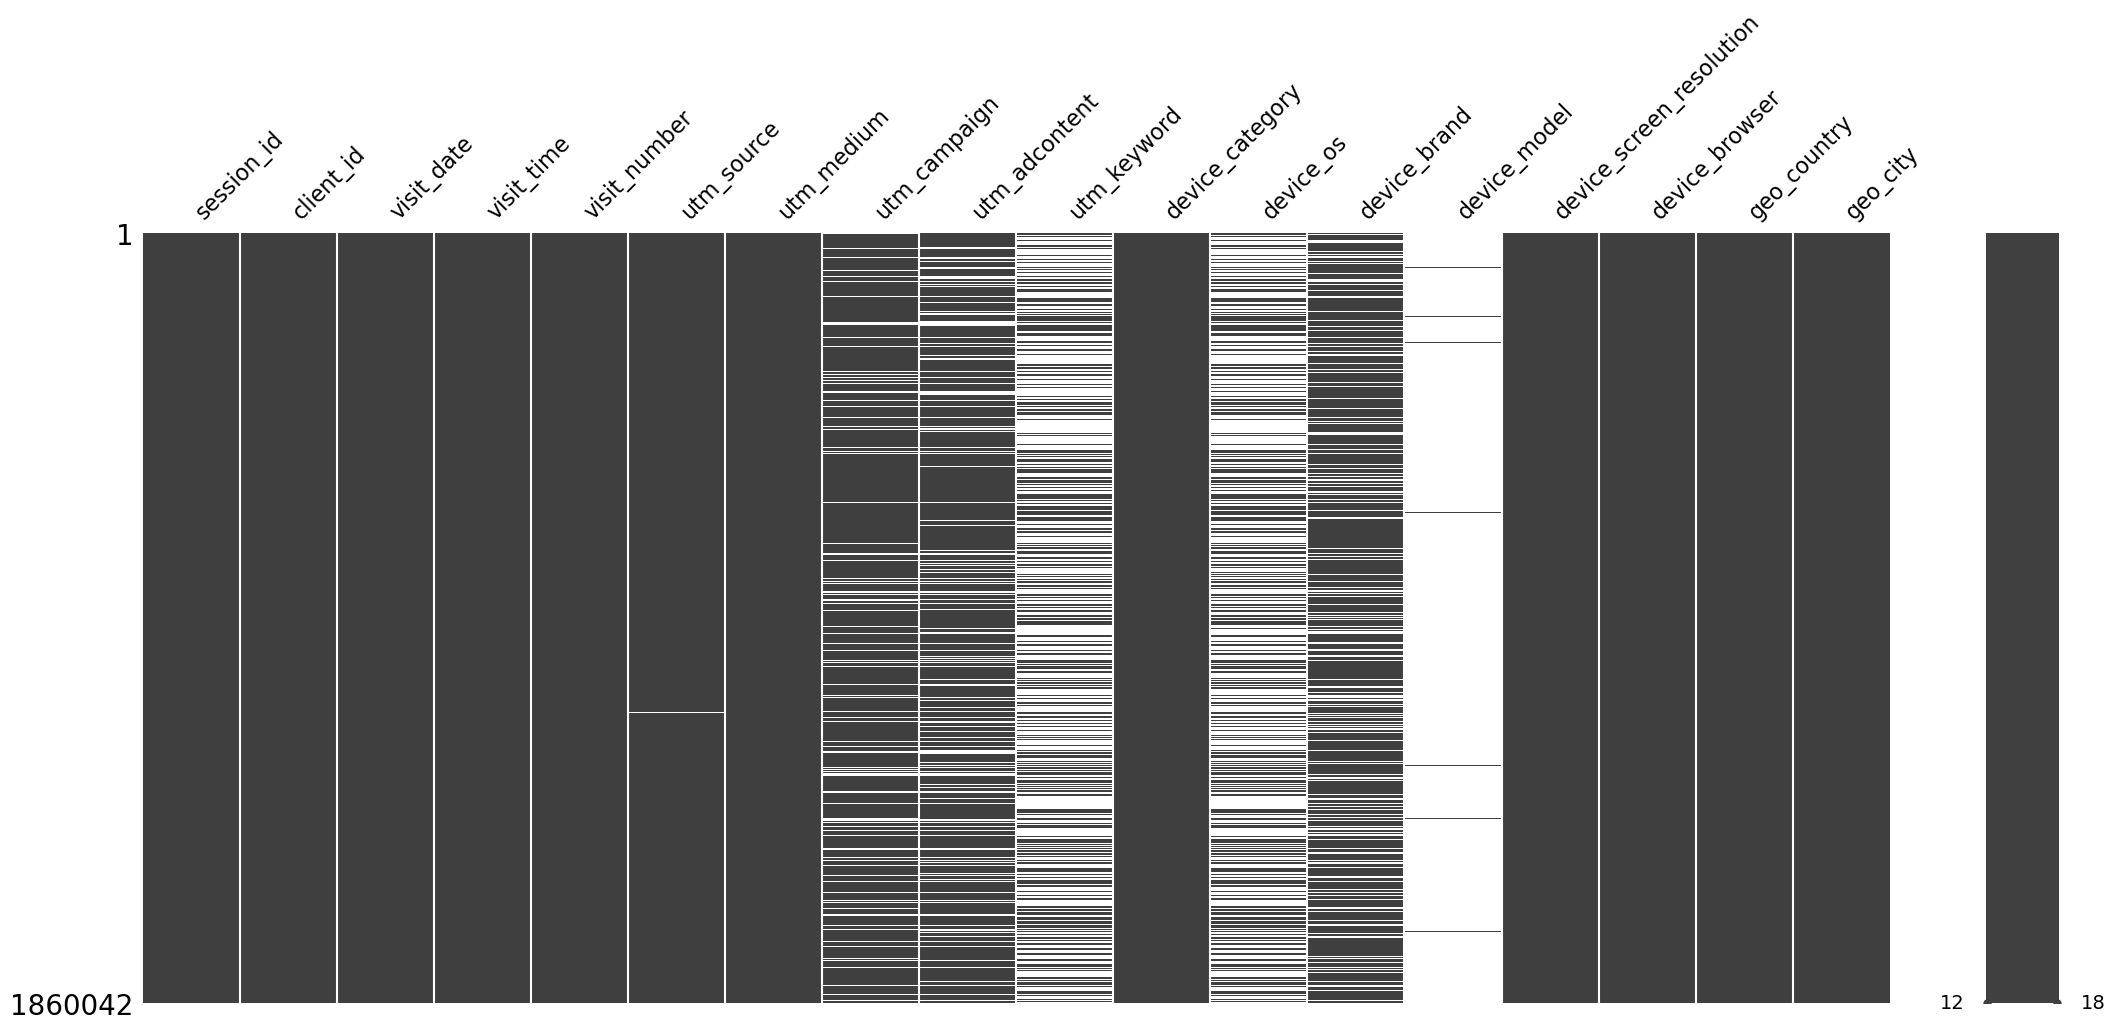

In [4]:
msno.bar(df)
msno.matrix(df)

In [5]:
df[df.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [6]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
missing_values

session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [7]:
df=df.drop(['device_model','utm_keyword','device_os'],axis=1)

In [8]:
df.device_brand.value_counts()

device_brand
Apple       551088
Samsung     332194
Xiaomi      288367
Huawei      185853
Realme       19058
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: count, Length: 205, dtype: int64

In [9]:
df.device_brand=df.device_brand.fillna('Apple')

In [10]:
df.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
                         ...  
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 412, dtype: int64

In [11]:
df.utm_campaign=df.utm_campaign.fillna('LTuZkdKfxRGVceoWkVyg')

In [12]:
df.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
                         ...   
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
WbXQsVOKLOcJrHikuQTZ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 286, dtype: int64

In [13]:
df.utm_adcontent=df.utm_adcontent.fillna('JNHcPlZPxEMWDnRiyoBf')

In [14]:
df.utm_source.value_counts()

utm_source
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: count, Length: 293, dtype: int64

In [15]:
df.utm_source=df.utm_source.fillna('ZpYIoDJMcFzVoPFsHGJL')

In [16]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
missing_values

session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64

In [17]:
df.utm_medium.value_counts()

utm_medium
banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article  

In [18]:
df1=pd.read_csv('ga_hits.csv')
df1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [19]:
df1

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


<Axes: >

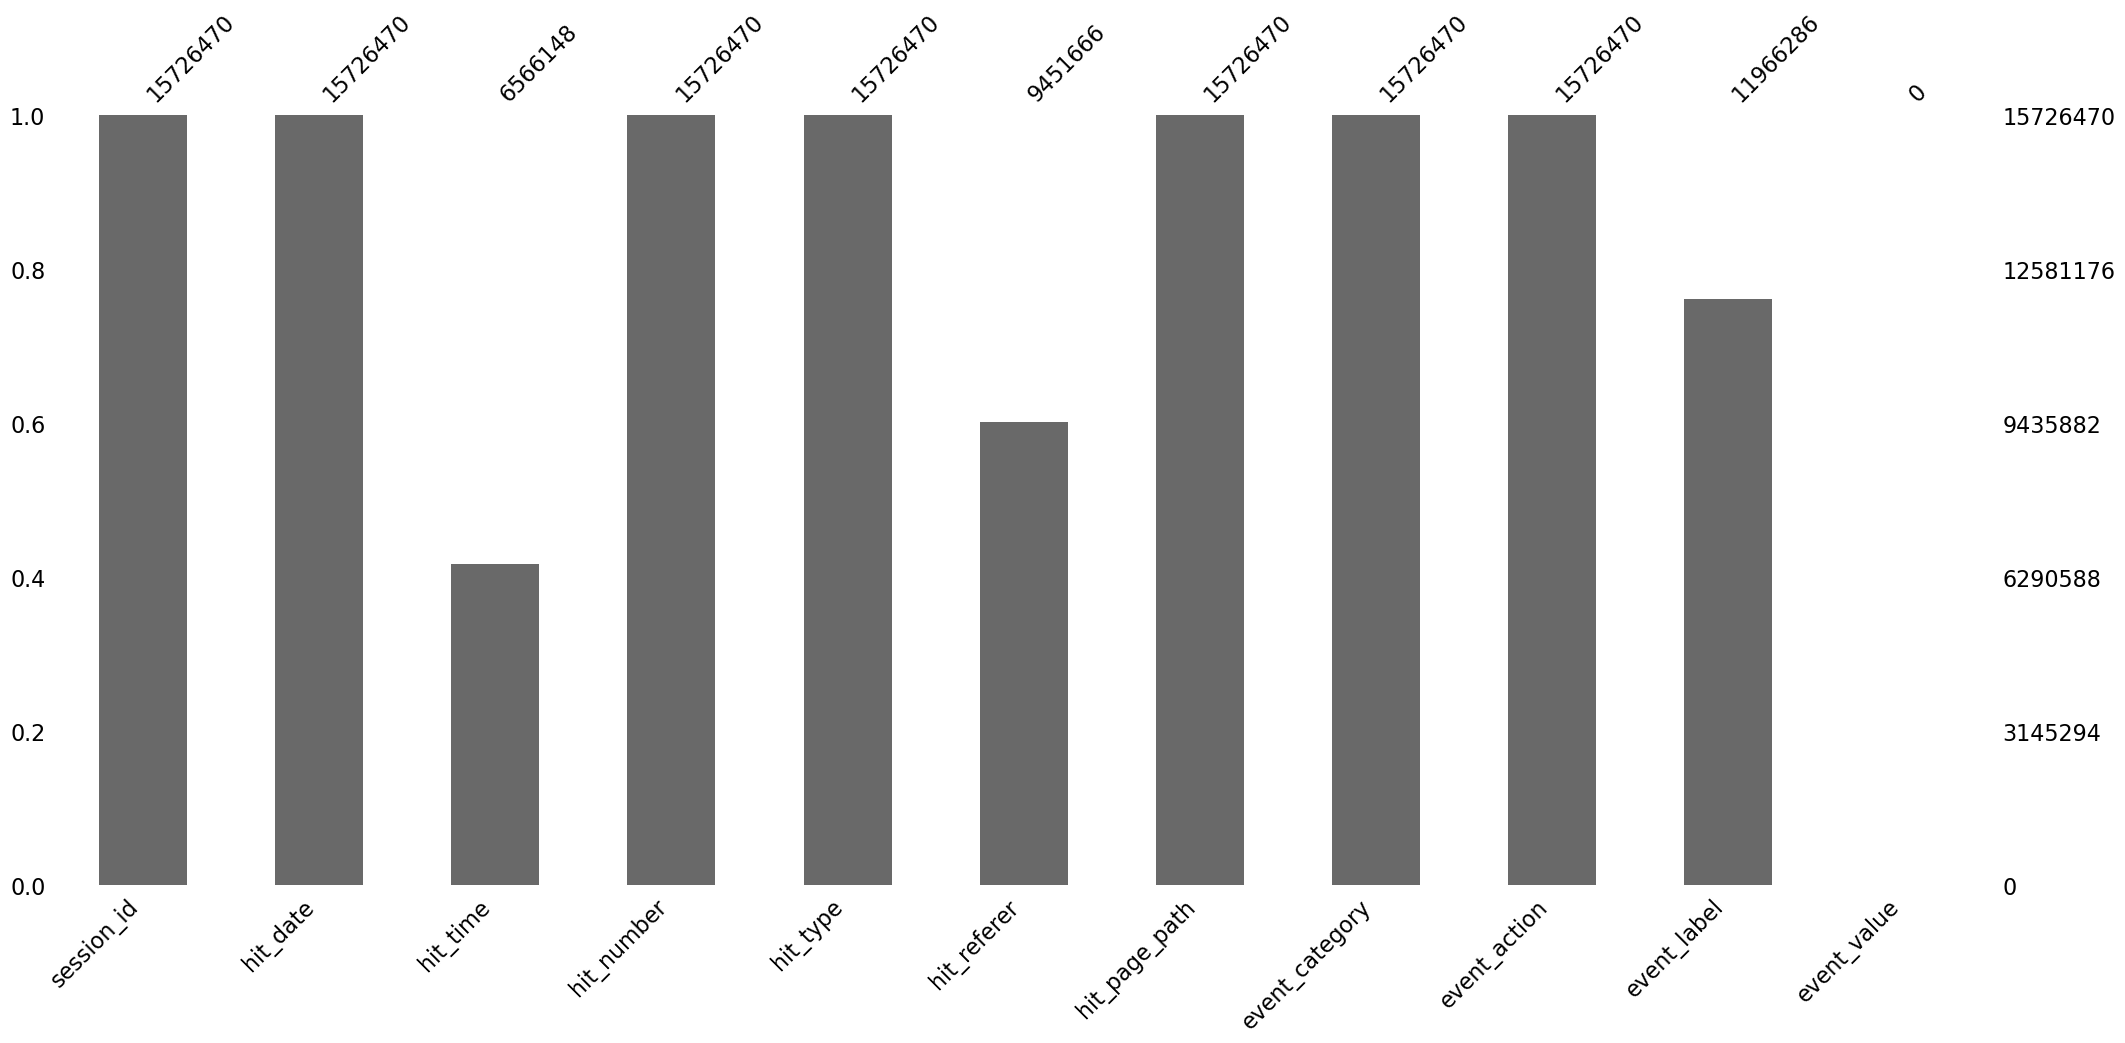

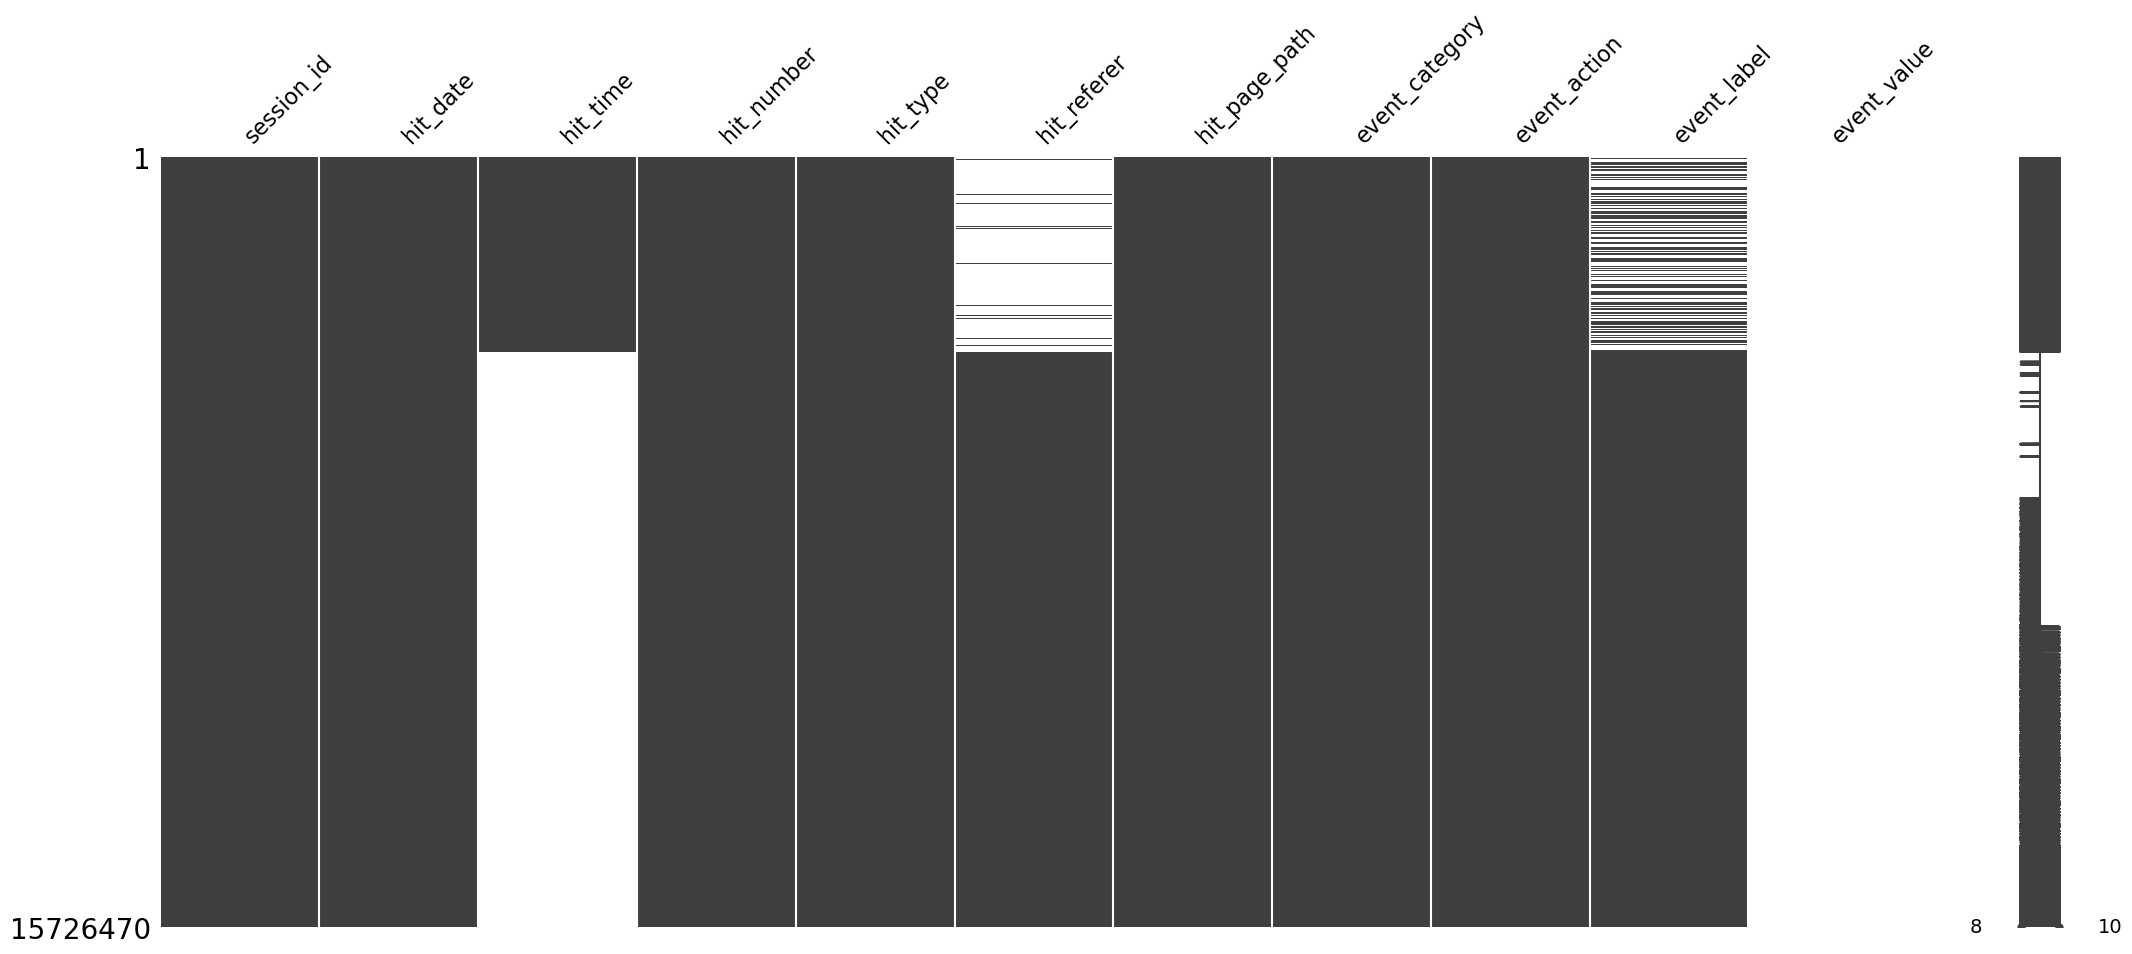

In [20]:
msno.bar(df1)
msno.matrix(df1)

In [21]:
df1[df1.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


In [22]:

df1=df1.drop_duplicates()

In [23]:
missing_values = ((df1.isna().sum() / len(df1)) * 100).sort_values()
missing_values

session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64

In [24]:
df1=df1.drop(['hit_time','event_value'],axis=1)

In [25]:
df1.event_label.value_counts()

event_label
KclpemfoHstknWHFiLit    6505447
hAHqGICPFQiPwtzubOzs    1284914
OHfyUfDKdPgBdvelDlfG     626554
pzAKUYdRKNEUXxxBFUPX     358915
ghOrjqpgskpGHSFfBBsi     342500
                         ...   
iFTveknOEiHmdgIHHqBZ          1
WKfoFxrMANSjHQMIhCZr          1
RAJXTkPWctNbMZubUIng          1
jRptuMMybqHerOxplPYo          1
aNlmojNIfsJaXKZHCDiU          1
Name: count, Length: 39825, dtype: int64

In [26]:
df1.event_label=df1.event_label.fillna('KclpemfoHstknWHFiLit')

In [27]:
df1.hit_referer.value_counts()

hit_referer
HbolMJUevblAbkHClEQa    8879187
FwdMTcXzWAwhtsnMAbhS      91940
sAGDBCdeVPmQPwkVEcIX      53565
GQmOLxANuSeCxCanBpMl      35470
ZeRnFrHdnMmnqraghdGJ      23016
                         ...   
VaOgrsicGpgIbzLNSDbc          1
rSeuBRLEcgyWsXrSYQqh          1
UNckxKWlzUxsKgvMBNdE          1
YZNVwxZKSbzYIwrGrgdY          1
tvGabHlPFDvTmIFiCKTL          1
Name: count, Length: 37873, dtype: int64

In [28]:
df1.hit_referer=df1.hit_referer.fillna('HbolMJUevblAbkHClEQa')

In [29]:
missing_values = ((df1.isna().sum() / len(df1)) * 100).sort_values()
missing_values

session_id        0.0
hit_date          0.0
hit_number        0.0
hit_type          0.0
hit_referer       0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
event_label       0.0
dtype: float64

# Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

Jрганический трафик и неорганический (или платный) трафик не являются зависимыми выборками. Они представляют различные источники посещений сайта и могут быть анализированы независимо друг от друга. Органический трафик происходит из поисковых систем, а неорганический может включать в себя платные рекламные кампании, социальные сети, реферальные ссылки и другие источники трафика.


In [31]:
df1

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,KclpemfoHstknWHFiLit
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,KclpemfoHstknWHFiLit
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,KclpemfoHstknWHFiLit
...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,43,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,KclpemfoHstknWHFiLit
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,40,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,KclpemfoHstknWHFiLit
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,43,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,KclpemfoHstknWHFiLit
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,45,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,KclpemfoHstknWHFiLit


In [32]:
df_1=df1[df1['event_action'].isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])]

In [33]:
grouped_df = df_1.groupby('session_id')['event_action'].nunique().reset_index()
grouped_df

,session_id,event_action
0,1000136488597247974.1639897063.1639897063,4
1,1000389444973162418.1621946290.1621946290,1
2,1000512929594478414.1638534989.1638534989,2
3,1001214989243294231.1638179143.1638179143,1
4,100138766161469545.1632428137.1632428137,1
...,...,...
50755,999746093241558256.1632212924.1632212924,3
50756,999806708110929695.1628076098.1628076098,1
50757,999819477043134339.1621901188.1621901188,1
50758,999869672343970659.1639949158.1639949158,1


In [34]:
merged_df = pd.merge(df, grouped_df[['session_id', 'event_action']], on='session_id', how='right')
merged_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,1000136488597247974.1639897063.1639897063,232862422.16399,2021-12-19,09:57:43,1.0,QxAxdyPLuQMEcrdZWdWb,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,385x854,Android Webview,Russia,Moscow,4
1,1000389444973162418.1621946290.1621946290,232921318.162195,2021-05-25,15:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1536x864,Chrome,Russia,Reutov,1
2,1000512929594478414.1638534989.1638534989,232950069.163853,2021-12-03,15:36:29,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,2
3,1001214989243294231.1638179143.1638179143,233113530.163818,2021-11-29,12:45:43,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,360x740,Chrome,Russia,Tula,1
4,100138766161469545.1632428137.1632428137,23315373.163243,2021-09-23,23:15:37,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x873,Chrome,Russia,Saint Petersburg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50755,999746093241558256.1632212924.1632212924,232771526.163154,2021-09-21,11:00:00,3.0,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,3
50756,999806708110929695.1628076098.1628076098,232785639.162747,2021-08-04,14:00:00,3.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,Safari,Russia,Kazan,1
50757,999819477043134339.1621901188.1621901188,232788612.16219,2021-05-25,03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,1
50758,999869672343970659.1639949158.1639949158,232800299.163995,2021-12-20,00:25:58,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,320x676,Chrome,Russia,Grozny,1


In [35]:
merged_df.event_action.value_counts()

event_action
1    30059
3    12969
2     6061
4     1162
5      376
6       81
7       51
8        1
Name: count, dtype: int64

In [36]:
#merged_df['event_action'] = merged_df['event_action'].fillna(0)

In [37]:
#merged_df

In [38]:
merged_df.event_action.value_counts()

event_action
1    30059
3    12969
2     6061
4     1162
5      376
6       81
7       51
8        1
Name: count, dtype: int64

In [39]:
merged_df['CR']=merged_df['event_action']/len(df['session_id'])

In [40]:
merged_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
0,1000136488597247974.1639897063.1639897063,232862422.16399,2021-12-19,09:57:43,1.0,QxAxdyPLuQMEcrdZWdWb,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,385x854,Android Webview,Russia,Moscow,4,2.150489e-06
1,1000389444973162418.1621946290.1621946290,232921318.162195,2021-05-25,15:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1536x864,Chrome,Russia,Reutov,1,5.376223e-07
2,1000512929594478414.1638534989.1638534989,232950069.163853,2021-12-03,15:36:29,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,2,1.075245e-06
3,1001214989243294231.1638179143.1638179143,233113530.163818,2021-11-29,12:45:43,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,360x740,Chrome,Russia,Tula,1,5.376223e-07
4,100138766161469545.1632428137.1632428137,23315373.163243,2021-09-23,23:15:37,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x873,Chrome,Russia,Saint Petersburg,1,5.376223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50755,999746093241558256.1632212924.1632212924,232771526.163154,2021-09-21,11:00:00,3.0,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,3,1.612867e-06
50756,999806708110929695.1628076098.1628076098,232785639.162747,2021-08-04,14:00:00,3.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,Safari,Russia,Kazan,1,5.376223e-07
50757,999819477043134339.1621901188.1621901188,232788612.16219,2021-05-25,03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,1,5.376223e-07
50758,999869672343970659.1639949158.1639949158,232800299.163995,2021-12-20,00:25:58,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,320x676,Chrome,Russia,Grozny,1,5.376223e-07


In [41]:
df_organic=merged_df[merged_df['utm_medium'].isin(['organic',
'referral', '(none)'])]

In [42]:
#общая конверсия
row_sum = merged_df.CR.sum()
row_sum 

0.04756182924901695

In [43]:


df_organic

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
1,1000389444973162418.1621946290.1621946290,232921318.162195,2021-05-25,15:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1536x864,Chrome,Russia,Reutov,1,5.376223e-07
2,1000512929594478414.1638534989.1638534989,232950069.163853,2021-12-03,15:36:29,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,2,1.075245e-06
12,1002744139321492267.1625080619.1625080619,233469563.162508,2021-06-30,22:00:00,1.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,834x1194,Safari,Russia,Moscow,1,5.376223e-07
13,1002799089144541140.1636552796.1636552796,233482357.163654,2021-11-10,16:59:56,2.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,YaBrowser,Russia,Kaliningrad,1,5.376223e-07
14,1002884056467836090.1621822650.1621822650,233502140.162182,2021-05-24,05:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,1,5.376223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,999746093241558256.1631798745.1631798745,232771526.163154,2021-09-16,16:00:00,2.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,1,5.376223e-07
50755,999746093241558256.1632212924.1632212924,232771526.163154,2021-09-21,11:00:00,3.0,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,3,1.612867e-06
50756,999806708110929695.1628076098.1628076098,232785639.162747,2021-08-04,14:00:00,3.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,Safari,Russia,Kazan,1,5.376223e-07
50757,999819477043134339.1621901188.1621901188,232788612.16219,2021-05-25,03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,1,5.376223e-07


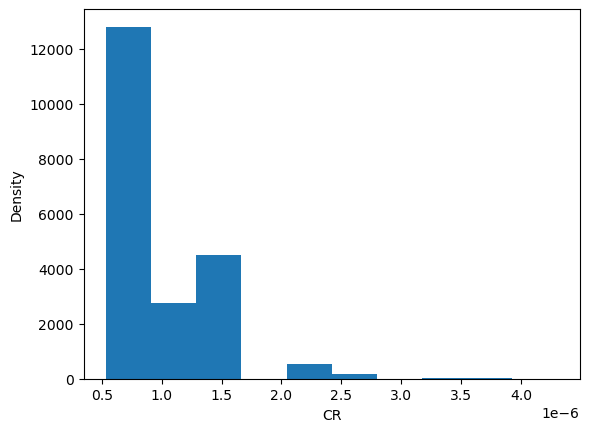

In [44]:
plt.hist(df_organic['CR'])
plt.xlabel('CR')  # Добавление подписи оси X
plt.ylabel('Density')  # Добавление подписи оси Y
plt.title('')  # Добавление заголовка
plt.show()

In [45]:
df_not_organic=merged_df[~merged_df['utm_medium'].isin(['organic',
'referral', '(none)'])]

In [46]:
df_not_organic

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
0,1000136488597247974.1639897063.1639897063,232862422.16399,2021-12-19,09:57:43,1.0,QxAxdyPLuQMEcrdZWdWb,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,385x854,Android Webview,Russia,Moscow,4,2.150489e-06
3,1001214989243294231.1638179143.1638179143,233113530.163818,2021-11-29,12:45:43,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,360x740,Chrome,Russia,Tula,1,5.376223e-07
4,100138766161469545.1632428137.1632428137,23315373.163243,2021-09-23,23:15:37,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x873,Chrome,Russia,Saint Petersburg,1,5.376223e-07
5,1001887379247785163.1627579597.1627579597,233270083.162758,2021-07-29,20:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Moscow,3,1.612867e-06
6,1001944274678763261.1626787895.1626787895,233283330.162679,2021-07-20,16:00:00,4.0,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Moscow,1,5.376223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50749,998207485629504605.1628777138.1628777138,232413291.162877,2021-08-12,17:00:00,2.0,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Moscow,2,1.075245e-06
50750,998380267875767374.1635685693.1635685693,232453520.163569,2021-10-31,16:08:13,2.0,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,3,1.612867e-06
50752,999112976404737980.1628860348.1628860348,232624117.162886,2021-08-13,16:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,1,5.376223e-07
50753,999128704579867938.1633752357.1633752357,232627779.163375,2021-10-09,07:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x800,Chrome,Russia,(not set),3,1.612867e-06


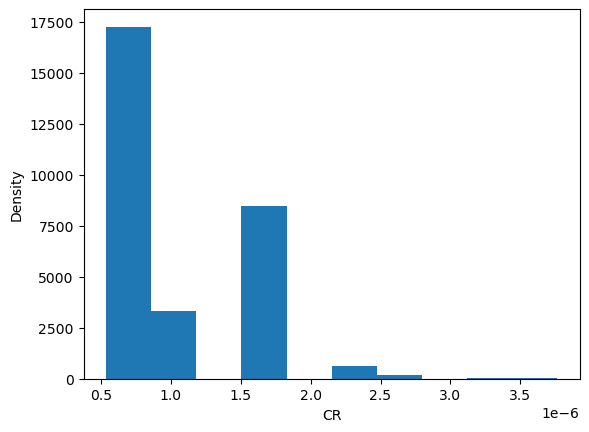

In [47]:
plt.hist(df_not_organic['CR'])
plt.xlabel('CR')  # Добавление подписи оси X
plt.ylabel('Density')  # Добавление подписи оси Y
plt.title('')  # Добавление заголовка
plt.show()

Нормальности в данных нет => U критерий Манна–Уитни

In [48]:
statistic, p_value = mannwhitneyu(df_organic['CR'],df_not_organic['CR'])

# Вывод результатов
print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между выборками.")

Статистика теста Манна-Уитни: 296417553.0
p-значение: 1.63975392794345e-26
Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.


# Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

Выборки для декстопных и мобильных устройств отличаются по размеру, болшинство методов для проверки зависимости выборок требуют равенства размеров выборок ( например коэффициент корреляции Пирсона в случае нормального распределения и Спирмена в случае ненормального ) => можно считать выборки независимыми 

In [49]:
mobile=merged_df[merged_df['device_category']=='mobile']
mobile

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
0,1000136488597247974.1639897063.1639897063,232862422.16399,2021-12-19,09:57:43,1.0,QxAxdyPLuQMEcrdZWdWb,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,385x854,Android Webview,Russia,Moscow,4,2.150489e-06
2,1000512929594478414.1638534989.1638534989,232950069.163853,2021-12-03,15:36:29,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,2,1.075245e-06
3,1001214989243294231.1638179143.1638179143,233113530.163818,2021-11-29,12:45:43,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,360x740,Chrome,Russia,Tula,1,5.376223e-07
4,100138766161469545.1632428137.1632428137,23315373.163243,2021-09-23,23:15:37,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x873,Chrome,Russia,Saint Petersburg,1,5.376223e-07
5,1001887379247785163.1627579597.1627579597,233270083.162758,2021-07-29,20:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Moscow,3,1.612867e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50752,999112976404737980.1628860348.1628860348,232624117.162886,2021-08-13,16:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,1,5.376223e-07
50753,999128704579867938.1633752357.1633752357,232627779.163375,2021-10-09,07:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x800,Chrome,Russia,(not set),3,1.612867e-06
50757,999819477043134339.1621901188.1621901188,232788612.16219,2021-05-25,03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,1,5.376223e-07
50758,999869672343970659.1639949158.1639949158,232800299.163995,2021-12-20,00:25:58,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,320x676,Chrome,Russia,Grozny,1,5.376223e-07


In [50]:
desktop=merged_df[merged_df['device_category']=='desktop']
desktop

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
1,1000389444973162418.1621946290.1621946290,232921318.162195,2021-05-25,15:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1536x864,Chrome,Russia,Reutov,1,5.376223e-07
12,1002744139321492267.1625080619.1625080619,233469563.162508,2021-06-30,22:00:00,1.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,834x1194,Safari,Russia,Moscow,1,5.376223e-07
13,1002799089144541140.1636552796.1636552796,233482357.163654,2021-11-10,16:59:56,2.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,YaBrowser,Russia,Kaliningrad,1,5.376223e-07
19,1003286464848770512.1632227507.1632227507,233595833.163189,2021-09-21,15:00:00,2.0,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1280x1024,Chrome,Russia,Klin,2,1.075245e-06
20,1003380202508210948.1630100039.1630100039,233617658.16301,2021-08-28,00:00:00,3.0,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,Safari,Russia,Moscow,3,1.612867e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50727,994756191645802983.1630216684.1630216684,231609724.163022,2021-08-29,08:00:00,1.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1280x1024,YaBrowser,Russia,(not set),1,5.376223e-07
50747,997874621378001289.1637825902.1637825902,232335790.163768,2021-11-25,10:38:22,3.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1280x1024,Chrome,Russia,Nizhny Novgorod,1,5.376223e-07
50754,999746093241558256.1631798745.1631798745,232771526.163154,2021-09-16,16:00:00,2.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,1,5.376223e-07
50755,999746093241558256.1632212924.1632212924,232771526.163154,2021-09-21,11:00:00,3.0,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,3,1.612867e-06


In [51]:
mobile['CR']

0        2.150489e-06
2        1.075245e-06
3        5.376223e-07
4        5.376223e-07
5        1.612867e-06
             ...     
50752    5.376223e-07
50753    1.612867e-06
50757    5.376223e-07
50758    5.376223e-07
50759    2.150489e-06
Name: CR, Length: 38379, dtype: float64

In [52]:
desktop['CR']

1        5.376223e-07
12       5.376223e-07
13       5.376223e-07
19       1.075245e-06
20       1.612867e-06
             ...     
50727    5.376223e-07
50747    5.376223e-07
50754    5.376223e-07
50755    1.612867e-06
50756    5.376223e-07
Name: CR, Length: 11513, dtype: float64

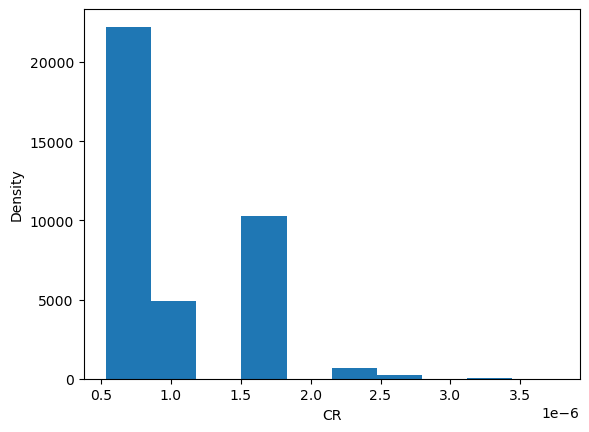

In [53]:
plt.hist(mobile['CR'])
plt.xlabel('CR')  # Добавление подписи оси X
plt.ylabel('Density')  # Добавление подписи оси Y
plt.title('')  # Добавление заголовка
plt.show()

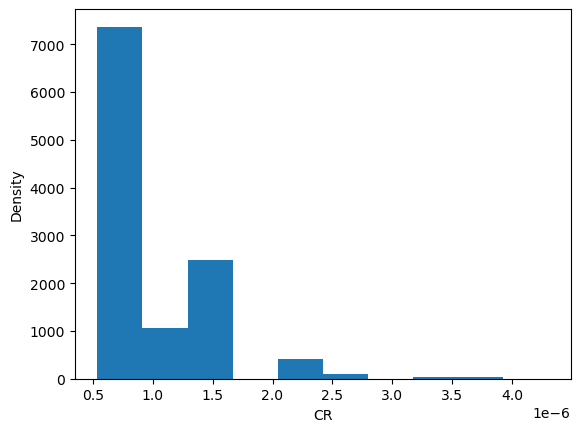

In [54]:
plt.hist(desktop['CR'])
plt.xlabel('CR')  # Добавление подписи оси X
plt.ylabel('Density')  # Добавление подписи оси Y
plt.title('')  # Добавление заголовка
plt.show()

Нормальности в данных нет => U критерий Манна–Уитни

In [55]:
statistic, p_value = mannwhitneyu(mobile['CR'],desktop['CR'])

# Вывод результатов
print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между выборками.")

Статистика теста Манна-Уитни: 230984361.5
p-значение: 3.193140505129365e-17
Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.


# Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события

Аналогично предыдущему пункту данные выборки в этом контексте можно считать независимыми.

In [56]:
df_Cities_of_presence=merged_df[(merged_df['geo_city']=='Moscow')|(merged_df['geo_city']=='Saint Petersburg')]
df_Cities_of_presence

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
0,1000136488597247974.1639897063.1639897063,232862422.16399,2021-12-19,09:57:43,1.0,QxAxdyPLuQMEcrdZWdWb,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,385x854,Android Webview,Russia,Moscow,4,2.150489e-06
2,1000512929594478414.1638534989.1638534989,232950069.163853,2021-12-03,15:36:29,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,2,1.075245e-06
4,100138766161469545.1632428137.1632428137,23315373.163243,2021-09-23,23:15:37,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x873,Chrome,Russia,Saint Petersburg,1,5.376223e-07
5,1001887379247785163.1627579597.1627579597,233270083.162758,2021-07-29,20:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Moscow,3,1.612867e-06
6,1001944274678763261.1626787895.1626787895,233283330.162679,2021-07-20,16:00:00,4.0,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Moscow,1,5.376223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50752,999112976404737980.1628860348.1628860348,232624117.162886,2021-08-13,16:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Moscow,1,5.376223e-07
50754,999746093241558256.1631798745.1631798745,232771526.163154,2021-09-16,16:00:00,2.0,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,1,5.376223e-07
50755,999746093241558256.1632212924.1632212924,232771526.163154,2021-09-21,11:00:00,3.0,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,3,1.612867e-06
50757,999819477043134339.1621901188.1621901188,232788612.16219,2021-05-25,03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,1,5.376223e-07


In [57]:
Cities_of_absence=merged_df[~((merged_df['geo_city']=='Moscow')|(merged_df['geo_city']=='Saint Petersburg'))]
Cities_of_absence

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
1,1000389444973162418.1621946290.1621946290,232921318.162195,2021-05-25,15:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1536x864,Chrome,Russia,Reutov,1,5.376223e-07
3,1001214989243294231.1638179143.1638179143,233113530.163818,2021-11-29,12:45:43,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,360x740,Chrome,Russia,Tula,1,5.376223e-07
7,1002181842212398146.1634378842.1634378842,233338643.163438,2021-10-16,13:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,ZTE,320x694,Chrome,Russia,Elista,1,5.376223e-07
9,1002255977647271572.1638756081.1638756081,233355904.163876,2021-12-06,05:01:21,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Xiaomi,393x851,Chrome,Ukraine,Horlivka,1,5.376223e-07
10,1002482077606083759.1634204849.1634204849,233408547.16342,2021-10-14,12:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Astrakhan,1,5.376223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50746,997843555866693626.1624821754.1624821754,232328557.162482,2021-06-27,22:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Chrome,Russia,Balashikha,1,5.376223e-07
50747,997874621378001289.1637825902.1637825902,232335790.163768,2021-11-25,10:38:22,3.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1280x1024,Chrome,Russia,Nizhny Novgorod,1,5.376223e-07
50753,999128704579867938.1633752357.1633752357,232627779.163375,2021-10-09,07:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Realme,360x800,Chrome,Russia,(not set),3,1.612867e-06
50756,999806708110929695.1628076098.1628076098,232785639.162747,2021-08-04,14:00:00,3.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,Safari,Russia,Kazan,1,5.376223e-07


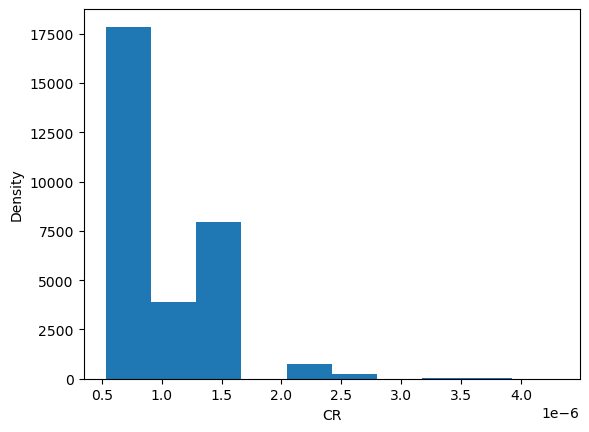

In [58]:
plt.hist(df_Cities_of_presence['CR'])
plt.xlabel('CR')  # Добавление подписи оси X
plt.ylabel('Density')  # Добавление подписи оси Y
plt.title('')  # Добавление заголовка
plt.show()

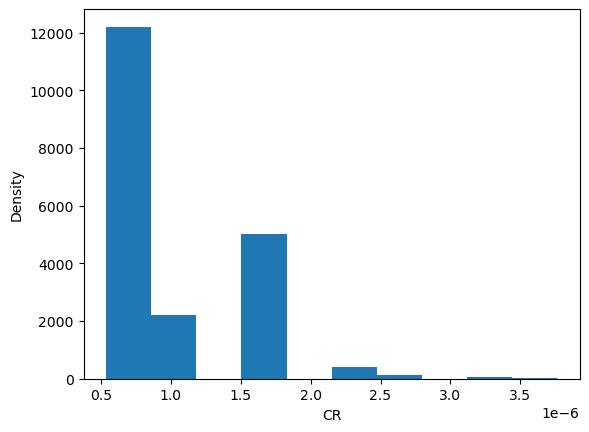

In [59]:
plt.hist(Cities_of_absence['CR'])
plt.xlabel('CR')  # Добавление подписи оси X
plt.ylabel('Density')  # Добавление подписи оси Y
plt.title('')  # Добавление заголовка
plt.show()

Нормальности в данных нет => U критерий Манна–Уитни

In [60]:
statistic, p_value = mannwhitneyu(df_Cities_of_presence['CR'],Cities_of_absence['CR'])

# Вывод результатов
print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между выборками.")

Статистика теста Манна-Уитни: 315959436.0
p-значение: 5.839440896057587e-09
Отвергаем нулевую гипотезу: существует статистически значимая разница между выборками.


# Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [61]:
# с точки зрения CR 0.04756182924901695 общий CR
df11=merged_df[['utm_campaign','device_category','geo_country','CR']]
df11

,utm_campaign,device_category,geo_country,CR
0,LTuZkdKfxRGVceoWkVyg,mobile,Russia,2.150489e-06
1,LTuZkdKfxRGVceoWkVyg,desktop,Russia,5.376223e-07
2,LTuZkdKfxRGVceoWkVyg,mobile,Russia,1.075245e-06
3,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,5.376223e-07
4,gecBYcKZCPMcVYdSSzKP,mobile,Russia,5.376223e-07
...,...,...,...,...
50755,LTuZkdKfxRGVceoWkVyg,desktop,Russia,1.612867e-06
50756,LTuZkdKfxRGVceoWkVyg,desktop,Russia,5.376223e-07
50757,LTuZkdKfxRGVceoWkVyg,mobile,Russia,5.376223e-07
50758,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,5.376223e-07


In [62]:
df11.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    26180
LEoPHuyFvzoNfnzGgfcd     9348
gecBYcKZCPMcVYdSSzKP     4545
FTjNLDyTrXaWYgZymFkV     2447
sbJRYgVfvcnqKJNDDYIr      575
                        ...  
TxKUcPpthBDPieTGmVhx        1
TPmcSCdCeBenCRczRhPK        1
qQToznZzQEwXqmrMVfCd        1
klTrhUaShgnjIbaPmqjc        1
rKHSSStqLNTbdGVZMwfG        1
Name: count, Length: 223, dtype: int64

In [63]:
df2=df11[df11['utm_campaign']=='LTuZkdKfxRGVceoWkVyg']

In [64]:
row_sum = df2.CR.sum()
row_sum 

0.024597831661865698

In [65]:
df11.device_category.value_counts()

device_category
mobile     38379
desktop    11513
tablet       422
Name: count, dtype: int64

In [66]:
df3=df11[df11['device_category']=='mobile']
df3

,utm_campaign,device_category,geo_country,CR
0,LTuZkdKfxRGVceoWkVyg,mobile,Russia,2.150489e-06
2,LTuZkdKfxRGVceoWkVyg,mobile,Russia,1.075245e-06
3,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,5.376223e-07
4,gecBYcKZCPMcVYdSSzKP,mobile,Russia,5.376223e-07
5,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,1.612867e-06
...,...,...,...,...
50752,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,5.376223e-07
50753,gecBYcKZCPMcVYdSSzKP,mobile,Russia,1.612867e-06
50757,LTuZkdKfxRGVceoWkVyg,mobile,Russia,5.376223e-07
50758,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,5.376223e-07


In [67]:
row_sum = df3.CR.sum()
row_sum 

0.036055637453347826

In [68]:
df11.geo_country.value_counts()

geo_country
Russia           49156
Ukraine            199
Germany             78
United States       64
Belarus             59
                 ...  
Slovakia             1
Belgium              1
Ireland              1
Hong Kong            1
India                1
Name: count, Length: 75, dtype: int64

In [69]:
df4=df11[df11['geo_country']=='Russia']

In [70]:
row_sum = df4.CR.sum()
row_sum 

0.04604035822847011

## Ответ: самый целевой трафик идет с рекламной компании LTuZkdKfxRGVceoWkVyg мобильных устройств и России с точки зрения CR


In [71]:
# с точки зрения объема трафика
df1

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,KclpemfoHstknWHFiLit
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,KclpemfoHstknWHFiLit
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,KclpemfoHstknWHFiLit
...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,43,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,KclpemfoHstknWHFiLit
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,40,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,KclpemfoHstknWHFiLit
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,43,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,KclpemfoHstknWHFiLit
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,45,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,KclpemfoHstknWHFiLit


In [72]:
merged_df1 = pd.merge(df1, df, on='session_id', how='left')

In [73]:
merged_df1[['session_id','utm_campaign','device_category','geo_country']]

,session_id,utm_campaign,device_category,geo_country
0,5639623078712724064.1640254056.1640254056,LTuZkdKfxRGVceoWkVyg,mobile,Russia
1,7750352294969115059.1640271109.1640271109,zxoiLxhuSIFrCeTLQVWZ,mobile,Russia
2,885342191847998240.1640235807.1640235807,LTuZkdKfxRGVceoWkVyg,desktop,Russia
3,142526202120934167.1640211014.1640211014,LTuZkdKfxRGVceoWkVyg,mobile,Russia
4,3450086108837475701.1640265078.1640265078,LTuZkdKfxRGVceoWkVyg,desktop,Estonia
...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,LTuZkdKfxRGVceoWkVyg,desktop,Russia
15726466,7310304587364460692.1640261783.1640261783,LTuZkdKfxRGVceoWkVyg,mobile,Russia
15726467,8013702685784312179.1640270195.1640270195,foFTSdUvNqqkPzZvgiqt,mobile,Russia
15726468,8021505554734405918.1640257821.1640257821,MZTDkjezphpnUHlvfRck,mobile,Russia


In [74]:
merged_df1.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    7365394
LEoPHuyFvzoNfnzGgfcd    3177265
gecBYcKZCPMcVYdSSzKP    1138547
FTjNLDyTrXaWYgZymFkV     750959
sbJRYgVfvcnqKJNDDYIr     184020
                         ...   
cXxuwXPoQCvAXPHpFcZl          1
ehLonfPENrOEoPTIyiOZ          1
KLznuVEblkSupUDWtCge          1
HXlcbndflGLufMTnkOso          1
XzfzEBYZWgSDtJNXOadn          1
Name: count, Length: 406, dtype: int64

In [75]:
merged_df1.device_category.value_counts()

device_category
mobile     11595541
desktop     3945254
tablet       144424
Name: count, dtype: int64

In [76]:
merged_df1.geo_country.value_counts()

geo_country
Russia                 15270908
Ukraine                   76283
United States             34389
Belarus                   29799
Germany                   25116
                         ...   
Congo - Brazzaville           2
Barbados                      1
Cameroon                      1
Paraguay                      1
Puerto Rico                   1
Name: count, Length: 159, dtype: int64

## Ответ: самый целевой трафик идет с рекламной компании LTuZkdKfxRGVceoWkVyg мобильных устройств и России с точки зрения объема траффика

# Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [90]:
df1=df1[df1['event_action'].isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])]


In [96]:
df1.hit_page_path.unique()

array(['sberauto.com/cars/all/kia/rio/fee33fe6?utm_source_initial=sbol&utm_medium_initial=push&utm_campaign_initial=sbJRYgVfvcnqKJNDDYIr&rental_page=rental_car',
       'sberauto.com/cars/all/skoda/rapid/bf24b977?utm_source_initial=sbol&utm_medium_initial=push&utm_campaign_initial=sbJRYgVfvcnqKJNDDYIr&rental_page=rental_car',
       'sberauto.com/cars/all/skoda/rapid/bf24b977?utm_source_initial=yandex&utm_medium_initial=cpc&utm_campaign_initial=DsqwamlMwRgMTyspCjFR|gDchtZpzPhEcUUlQzgsT&utm_content_initial=yXzSAJWSuRbYeLFyMVFl|shhJpwqRdkvQHnFvfjmR|xAEYTlJDbQNwQTLGxICQ|KyVyYBQwERHeTfHuWftp|lFpAoUqEvHoyZfCNRuCR|fmccXPSqeNhVSqZbbyTp|rjbbNGNkjGThUJNtsWZQ|ciiiNxDSAfUjPxsQtTYB|ZIKCVYXYgRrZdwlVkEEf|HbolMJUevblAbkHClEQa|kqZPVvZmXADsCZxIQwbv|vnTlRpYmthtVDImMLSmr|OfdDOXSwHYclonQJpPxh|YhdYMAYSoTzDKQYzVVMr|HbolMJUevblAbkHClEQa&utm_term_initial=&rental_page=rental_car',
       ...,
       'sberauto.com/cars/all/skoda/rapid/bf24b977?rental_page=rental_car&fbclid=paaay2ruia89srb3zj2gsvymrmsun6ke3amqfa

In [157]:
 df1['car']=df1['hit_page_path'].str.split('/').apply(lambda x: ' '.join(x[3:5]))

C:\Users\Prokofiy\AppData\Local\Temp\ipykernel_17648\2590990656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['car']=df1['hit_page_path'].str.split('/').apply(lambda x: ' '.join(x[3:5]))


In [158]:
df1

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,car
4016,2744563715298057088.1640258436.1640258436,2021-12-23,81,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,kia rio
4045,3087297479839089634.1640268774.1640268774,2021-12-23,22,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,skoda rapid
4046,3156966333326004302.1640206419.1640206800,2021-12-23,63,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,skoda rapid
4047,3750243879753098158.1640272208.1640272208,2021-12-23,20,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,nissan x-trail
4048,7518333712042258254.1640258901.1640258901,2021-12-23,16,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,mercedes-benz gla-klasse
...,...,...,...,...,...,...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13,30,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_submit_click,KclpemfoHstknWHFiLit,lada-vaz vesta
15725133,965861352491898977.1636751459.1636751459,2021-11-13,18,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,volkswagen polo
15725134,4727705172767122620.1636818847.1636818847,2021-11-13,43,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,uimgZZmhfLQwbKAZZfCk,volkswagen polo
15725135,4727705172767122620.1636818847.1636818847,2021-11-13,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,volkswagen polo


In [159]:
df1.car.value_counts()

car
                                                                                                                                                                    72906
skoda rapid                                                                                                                                                          6030
lada-vaz vesta                                                                                                                                                       5356
volkswagen polo                                                                                                                                                      4634
kia rio                                                                                                                                                              1438
                                                                                                                                                  

# Ответ : skoda rapid  , vesta, folkswagen polo  

# Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [161]:
merged_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,CR
0,1000136488597247974.1639897063.1639897063,232862422.16399,2021-12-19,09:57:43,1.0,QxAxdyPLuQMEcrdZWdWb,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,385x854,Android Webview,Russia,Moscow,4,2.150489e-06
1,1000389444973162418.1621946290.1621946290,232921318.162195,2021-05-25,15:00:00,1.0,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1536x864,Chrome,Russia,Reutov,1,5.376223e-07
2,1000512929594478414.1638534989.1638534989,232950069.163853,2021-12-03,15:36:29,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,2,1.075245e-06
3,1001214989243294231.1638179143.1638179143,233113530.163818,2021-11-29,12:45:43,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,360x740,Chrome,Russia,Tula,1,5.376223e-07
4,100138766161469545.1632428137.1632428137,23315373.163243,2021-09-23,23:15:37,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x873,Chrome,Russia,Saint Petersburg,1,5.376223e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50755,999746093241558256.1632212924.1632212924,232771526.163154,2021-09-21,11:00:00,3.0,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,3,1.612867e-06
50756,999806708110929695.1628076098.1628076098,232785639.162747,2021-08-04,14:00:00,3.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1440x900,Safari,Russia,Kazan,1,5.376223e-07
50757,999819477043134339.1621901188.1621901188,232788612.16219,2021-05-25,03:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Saint Petersburg,1,5.376223e-07
50758,999869672343970659.1639949158.1639949158,232800299.163995,2021-12-20,00:25:58,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,320x676,Chrome,Russia,Grozny,1,5.376223e-07


In [162]:
df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk


# Соотношение  id  внесших конверсию ко всем рекламным ID :

In [164]:
len(merged_df['session_id'])/len(df['session_id'])

0.027289706361469258

## Все зависит от окупаемости затрат потраченых  на рекламу но процент маленький